In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk
import tkinter.filedialog as fd
import numpy as np
import re

In [24]:
def number_type_cell_from_imagename(name):
    name_split = re.split(r'^(\d*)(\w*)\s(\w*)', name)
    image_number = name_split[1]
    image_type = name_split[3]
    cell_type = name_split[2]

    return(image_number,image_type,cell_type)
    
    

In [11]:
root = tk.Tk()
folder_path = fd.askdirectory(parent=root, title='Folder with images')

cells_path = folder_path + "/Cells_detected.csv"
apoptosis_path = folder_path + "/Apoptotic_Cleared.csv"
necrosis_path = folder_path + "/Necrotic_Cleared.csv"
an_path = folder_path + "/Necrotic_Apoptotic_Cells.csv"

cells_df = pd.read_csv(cells_path)
apoptosis_df = pd.read_csv(apoptosis_path)
necrosis_df = pd.read_csv(necrosis_path)
an_df = pd.read_csv(an_path)

print(np.shape(cells_df))

(46392, 18)


In [49]:
image_names = pd.unique(cells_df.loc[:,"FileName_Original"]) #Extract unique names of images
result_df_sns = pd.DataFrame({'Image type':[], 'Cells type':[], 'Cells number':[], 'Cell line':[]})
result_df_sns_norm = pd.DataFrame({'Image type':[], 'Cells type':[], 'Cells number':[], 'Cell line':[]})

In [55]:
for name in image_names:
    cells_df_current = cells_df.loc[cells_df["FileName_Original"] == name] #Extract all rows with same image name
    apoptosis_df_current = apoptosis_df.loc[apoptosis_df["FileName_Original"] == name]
    necrosis_df_current = necrosis_df.loc[necrosis_df["FileName_Original"] == name]
    an_df_current = an_df.loc[an_df["FileName_Original"] == name]

    apoptosis_number = apoptosis_df_current.shape[0]
    necrosis_number = necrosis_df_current.shape[0]
    an_number = an_df_current.shape[0]
    all_cells_number = cells_df_current.shape[0] #Count number of rows with same image name

    normal_cells_number = all_cells_number - an_number - necrosis_number - apoptosis_number

    an_number_norm = an_number/all_cells_number*100
    necrosis_number_norm = necrosis_number/all_cells_number*100
    apoptosis_number_norm = apoptosis_number/all_cells_number*100
    normal_cells_number_norm = normal_cells_number/all_cells_number*100

    # Extract original image number from image name
    image_number,image_type,cell_line = number_type_cell_from_imagename(name)


    current_df_sns = pd.DataFrame({'Image type':[image_type,image_type,image_type,image_type], 'Cells Type':["Normal Cells","Apoptotic","Late Apoptotic","Necrotic"],
        'Cells number':[normal_cells_number,apoptosis_number,an_number,necrosis_number], 'Cell line':[cell_line,cell_line,cell_line,cell_line]})


    current_df_sns_normalized = pd.DataFrame({'Image type':[image_type,image_type,image_type,image_type], 'Cells Type':["Normal Cells","Apoptotic","Late Apoptotic","Necrotic"],
        'Cells number':[normal_cells_number_norm,apoptosis_number_norm,an_number_norm,necrosis_number_norm], 'Cell line':[cell_line,cell_line,cell_line,cell_line]})

    #Append current data to result df
    result_df_sns = pd.concat([current_df_sns,result_df_sns])

    result_df_sns_norm = pd.concat([current_df_sns_normalized,result_df_sns_norm])

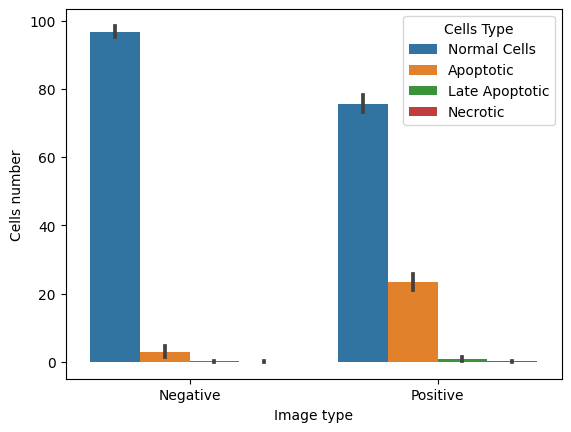

In [54]:
sns.barplot(data=result_df_sns, x="Image type", y="Cells number", hue = 'Cells Type', errorbar = 'sd')
plt.show()